In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')

import os, sys, time
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_GeneralSignalProcNAnalysis import *
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
from obspy.imaging import spectrogram

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

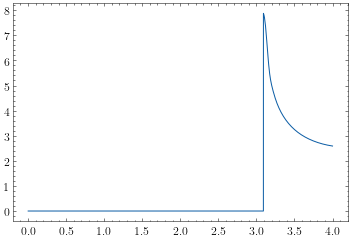

In [3]:
path = '/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/Old/TEAR7_Kos_T0_P3_025x025_d1.001/'
Filename = 'receiverCP-dr-800x800-p3.dat'

Dataframe = pd.read_csv(path+Filename, header=35, sep= ' ',
                       names=["Time","slip_st1", "sliprate_st1", "mu_st1", "sliding_st1",
                                     "slip_st2", "sliprate_st2", "mu_st2", "sliding_st2",
                                     "slip_st3", "sliprate_st3", "mu_st3", "sliding_st3",
                                     "slip_st4", "sliprate_st4", "mu_st4", "sliding_st4",
                                     "slip_st5", "sliprate_st5", "mu_st5", "sliding_st5",
                                     "slip_st6", "sliprate_st6", "mu_st6", "sliding_st6",
                                     "slip_st7", "sliprate_st7", "mu_st7", "sliding_st7"]
                       )



station = str(4)

ColumnOfInterest = [i.format(station) for i in ["slip_st{}", "sliprate_st{}", "mu_st{}", "sliding_st{}"]]
ColumnOfInterest.insert(0,"Time")
DataStation = Dataframe[ColumnOfInterest]

time = np.asarray(DataStation.Time.tolist())
Vel = np.asarray(DataStation["sliprate_st{}".format(station)].tolist())
accel = np.asarray(pd.Series(np.gradient(DataStation["sliprate_st{}".format(station)]), time, name='slope').tolist())

plt.plot(time,Vel)

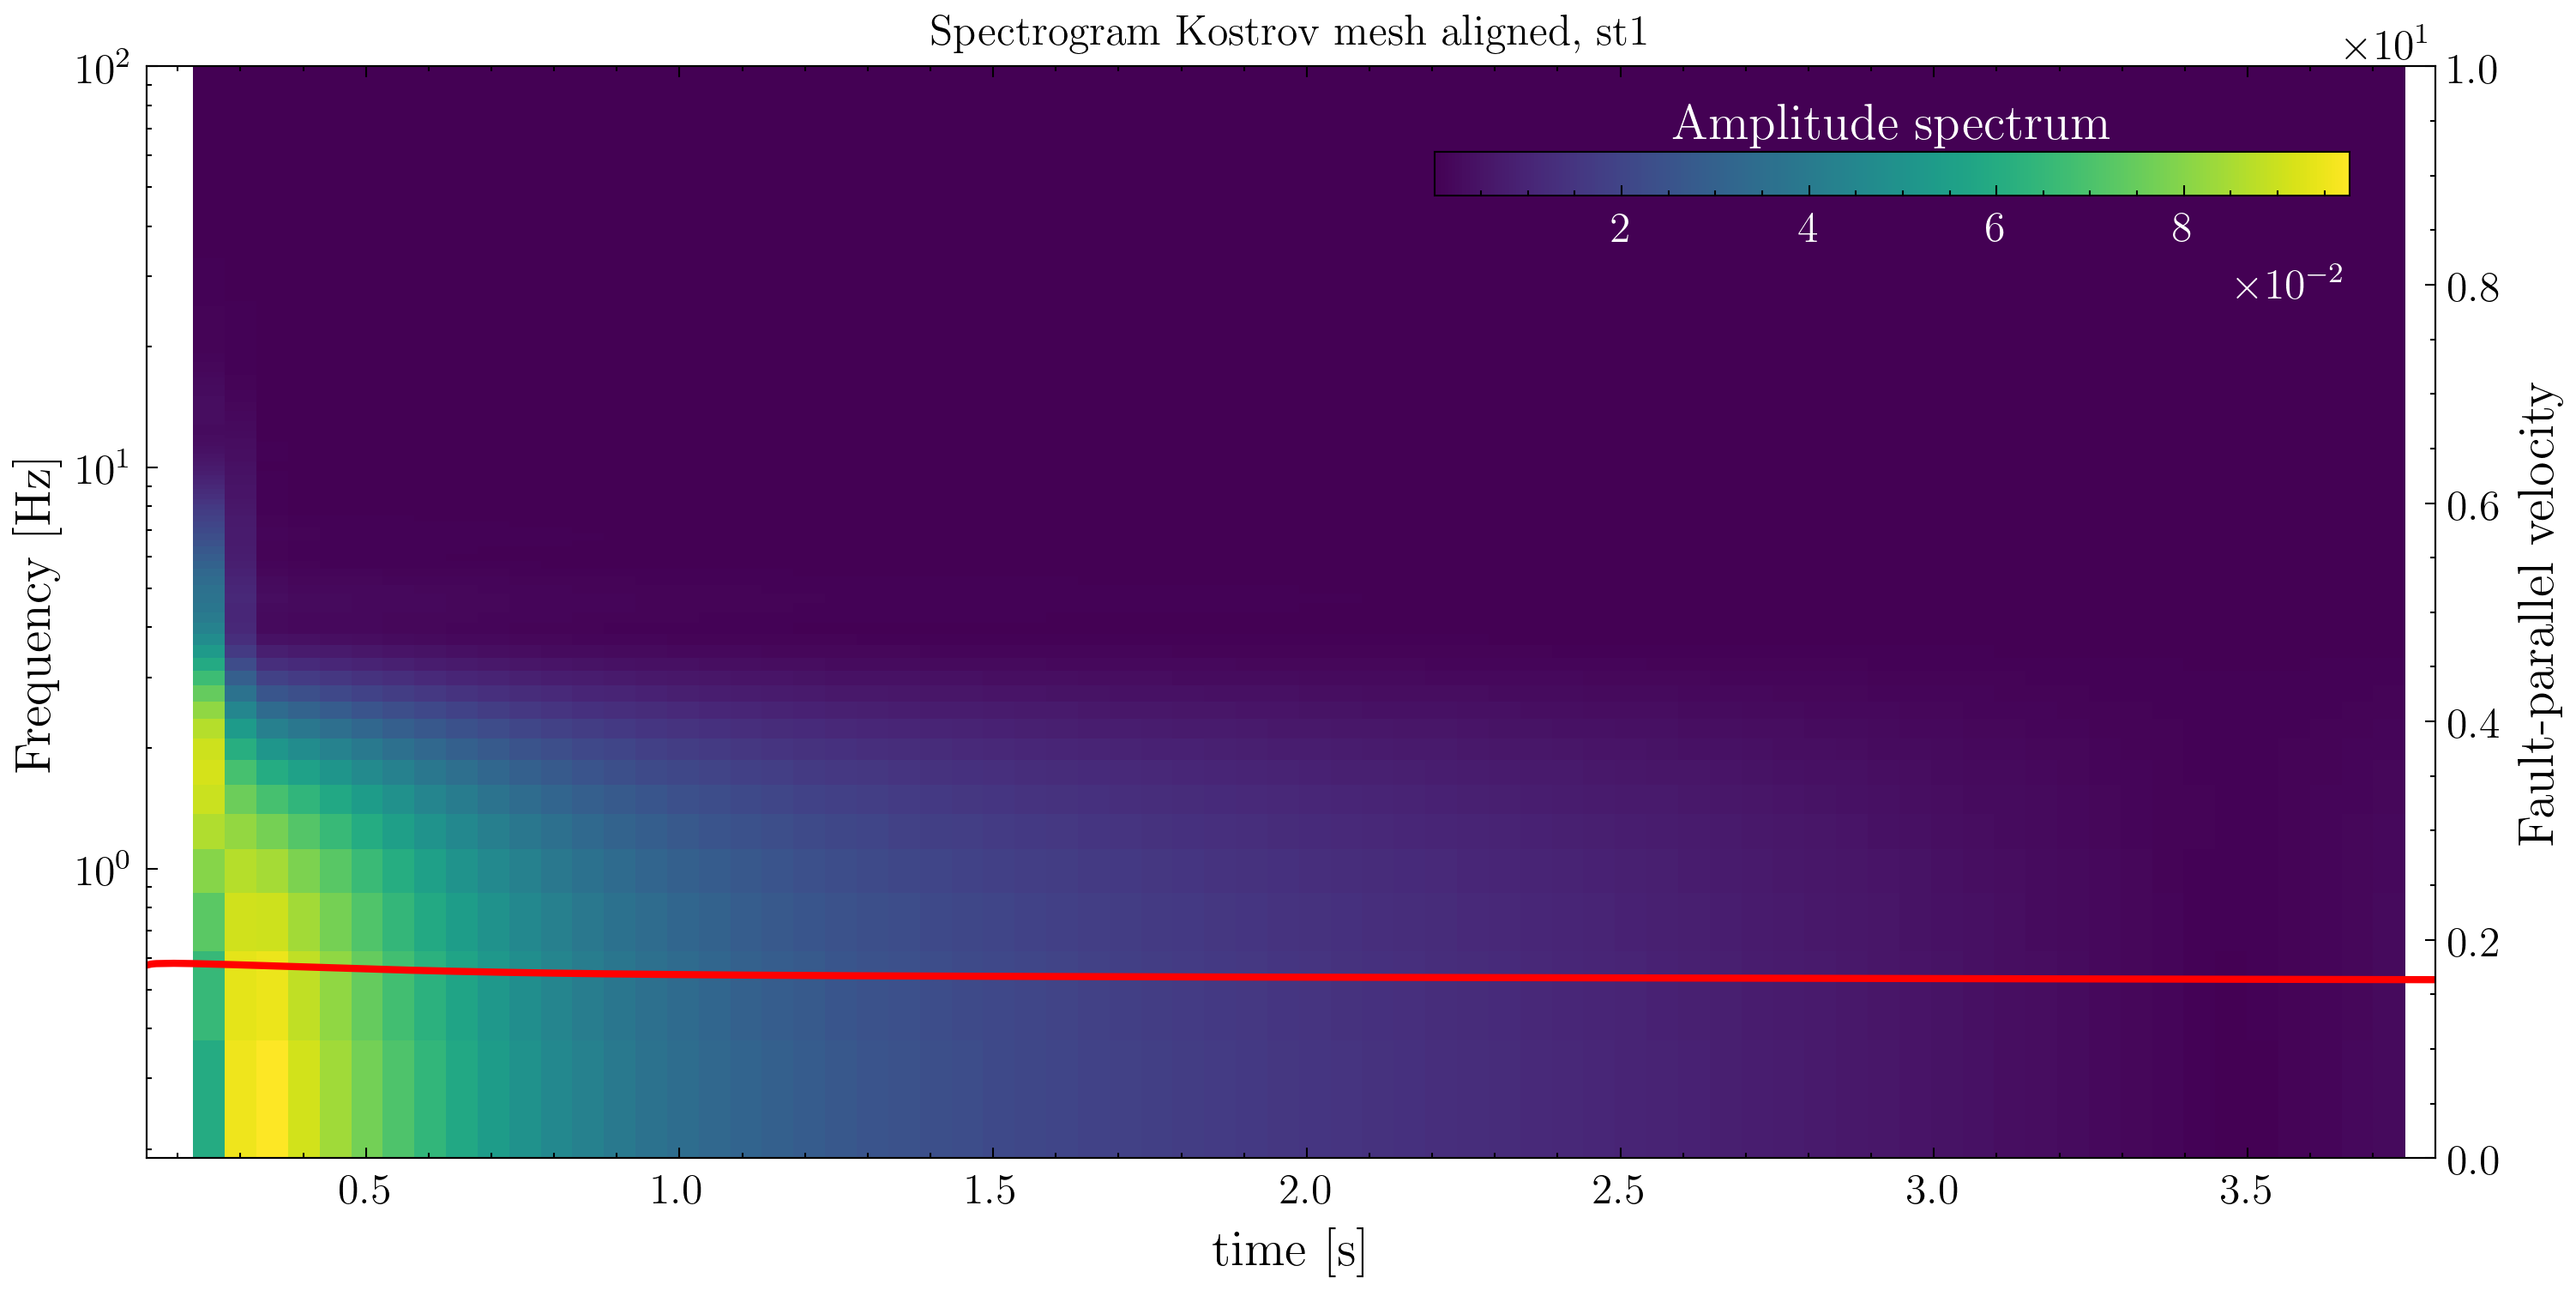

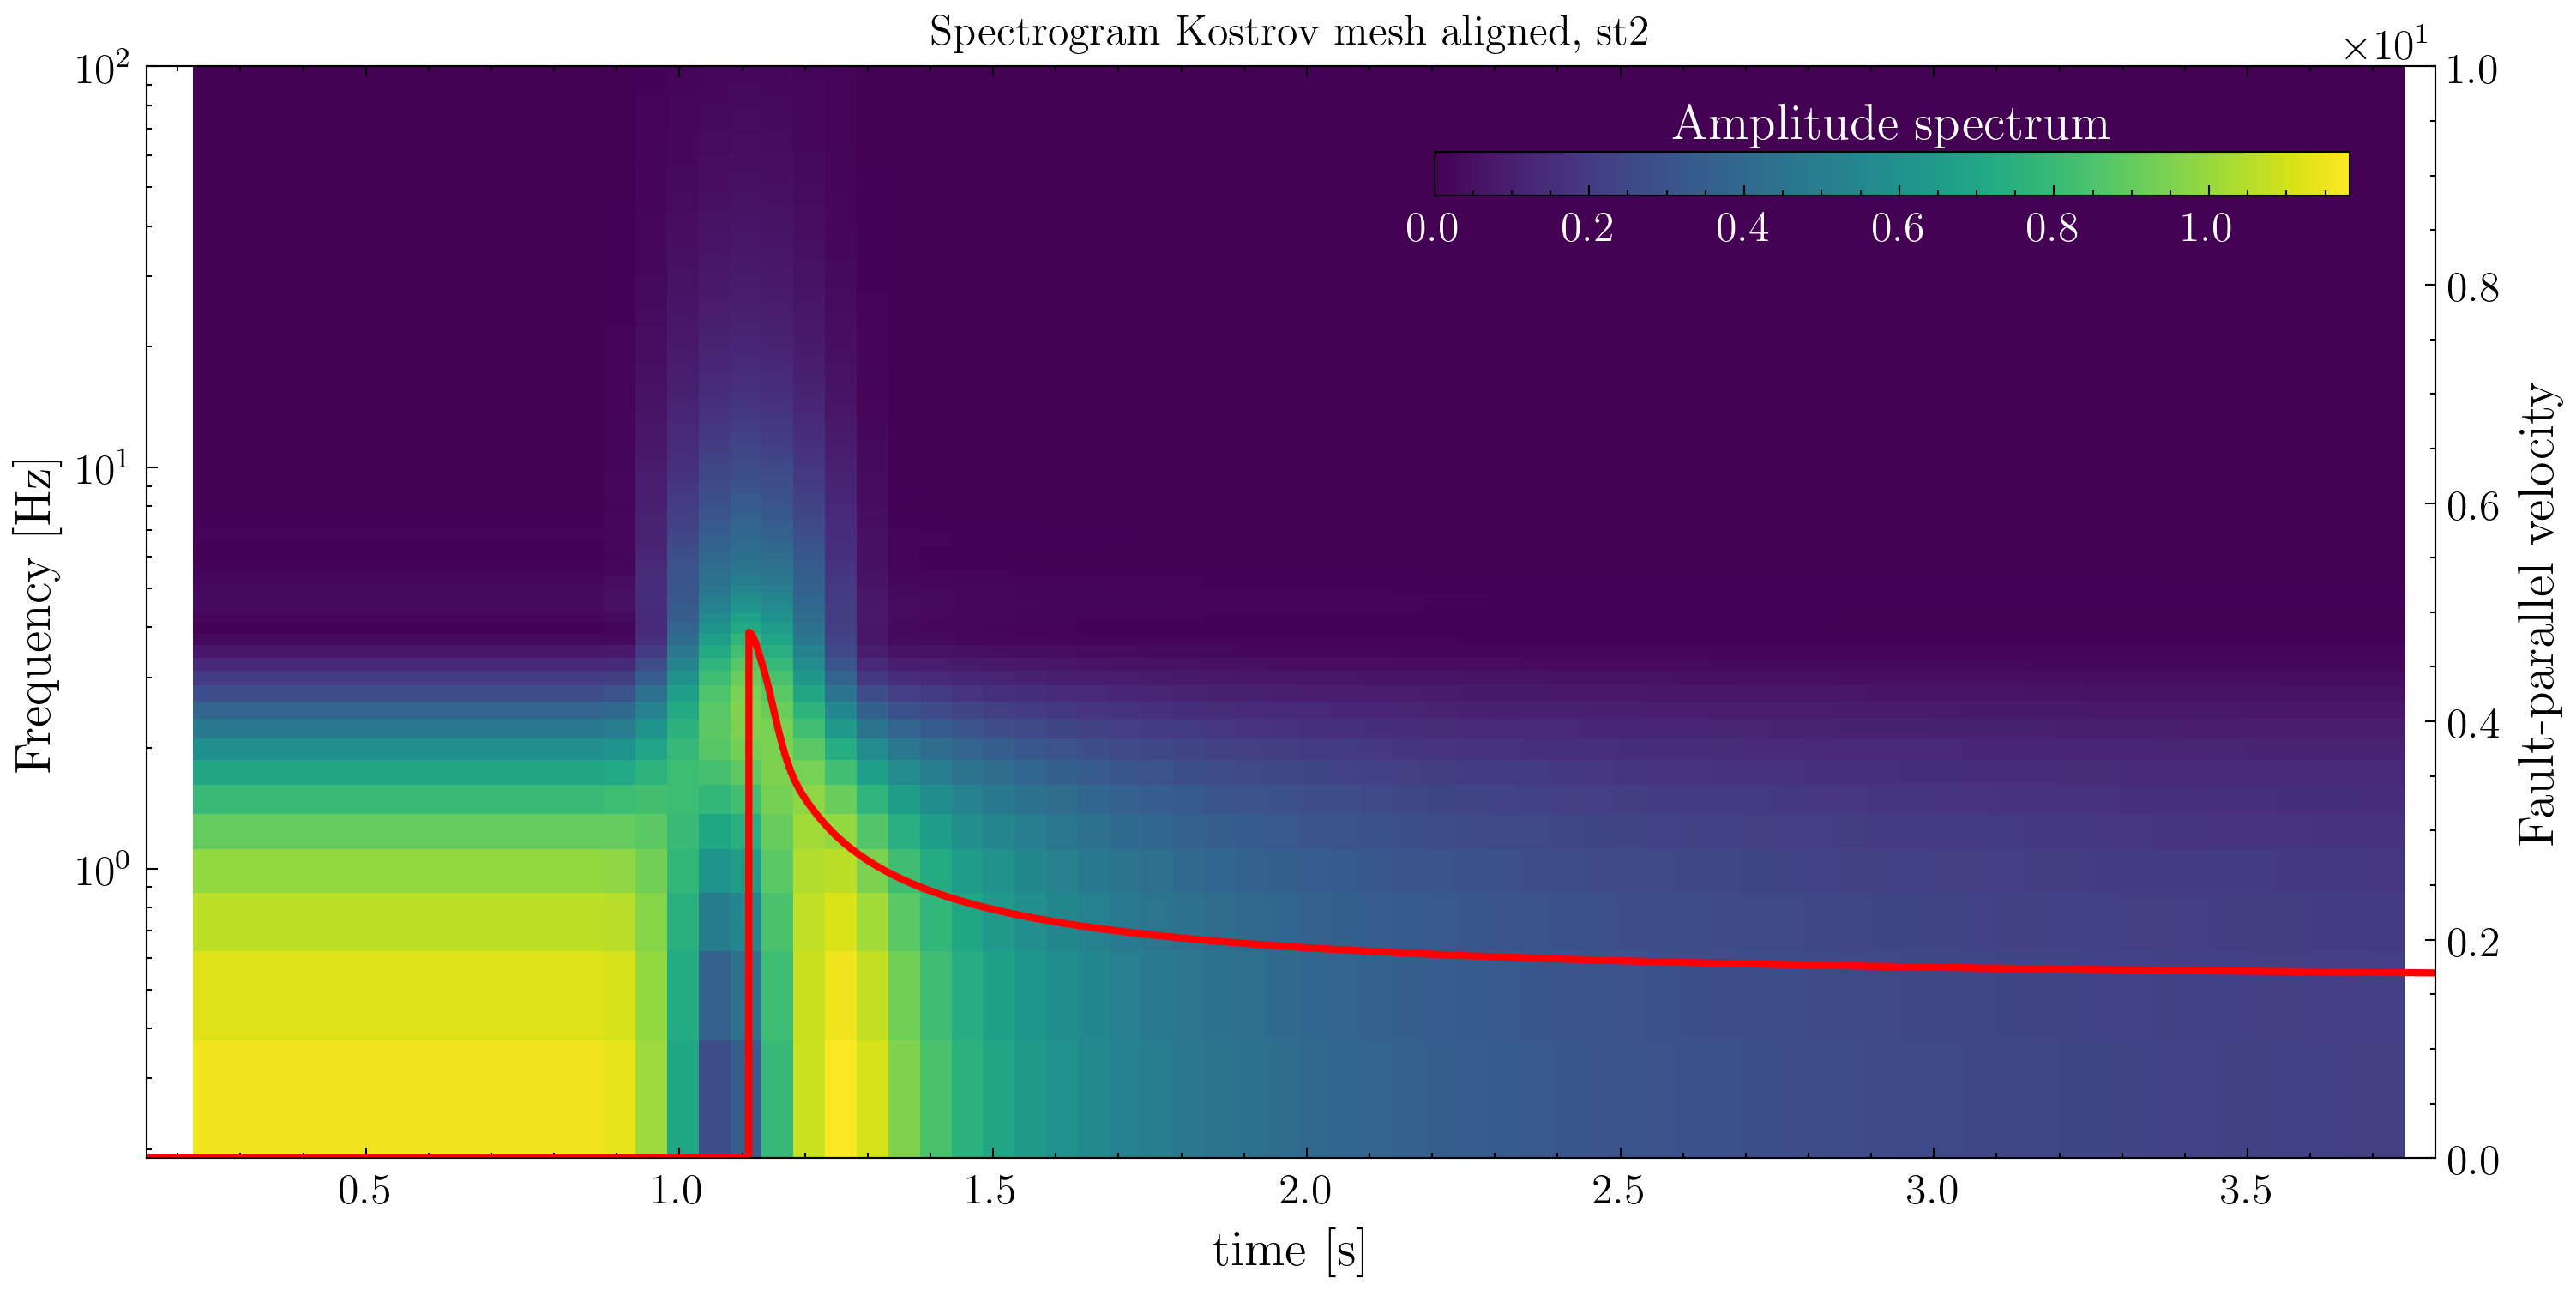

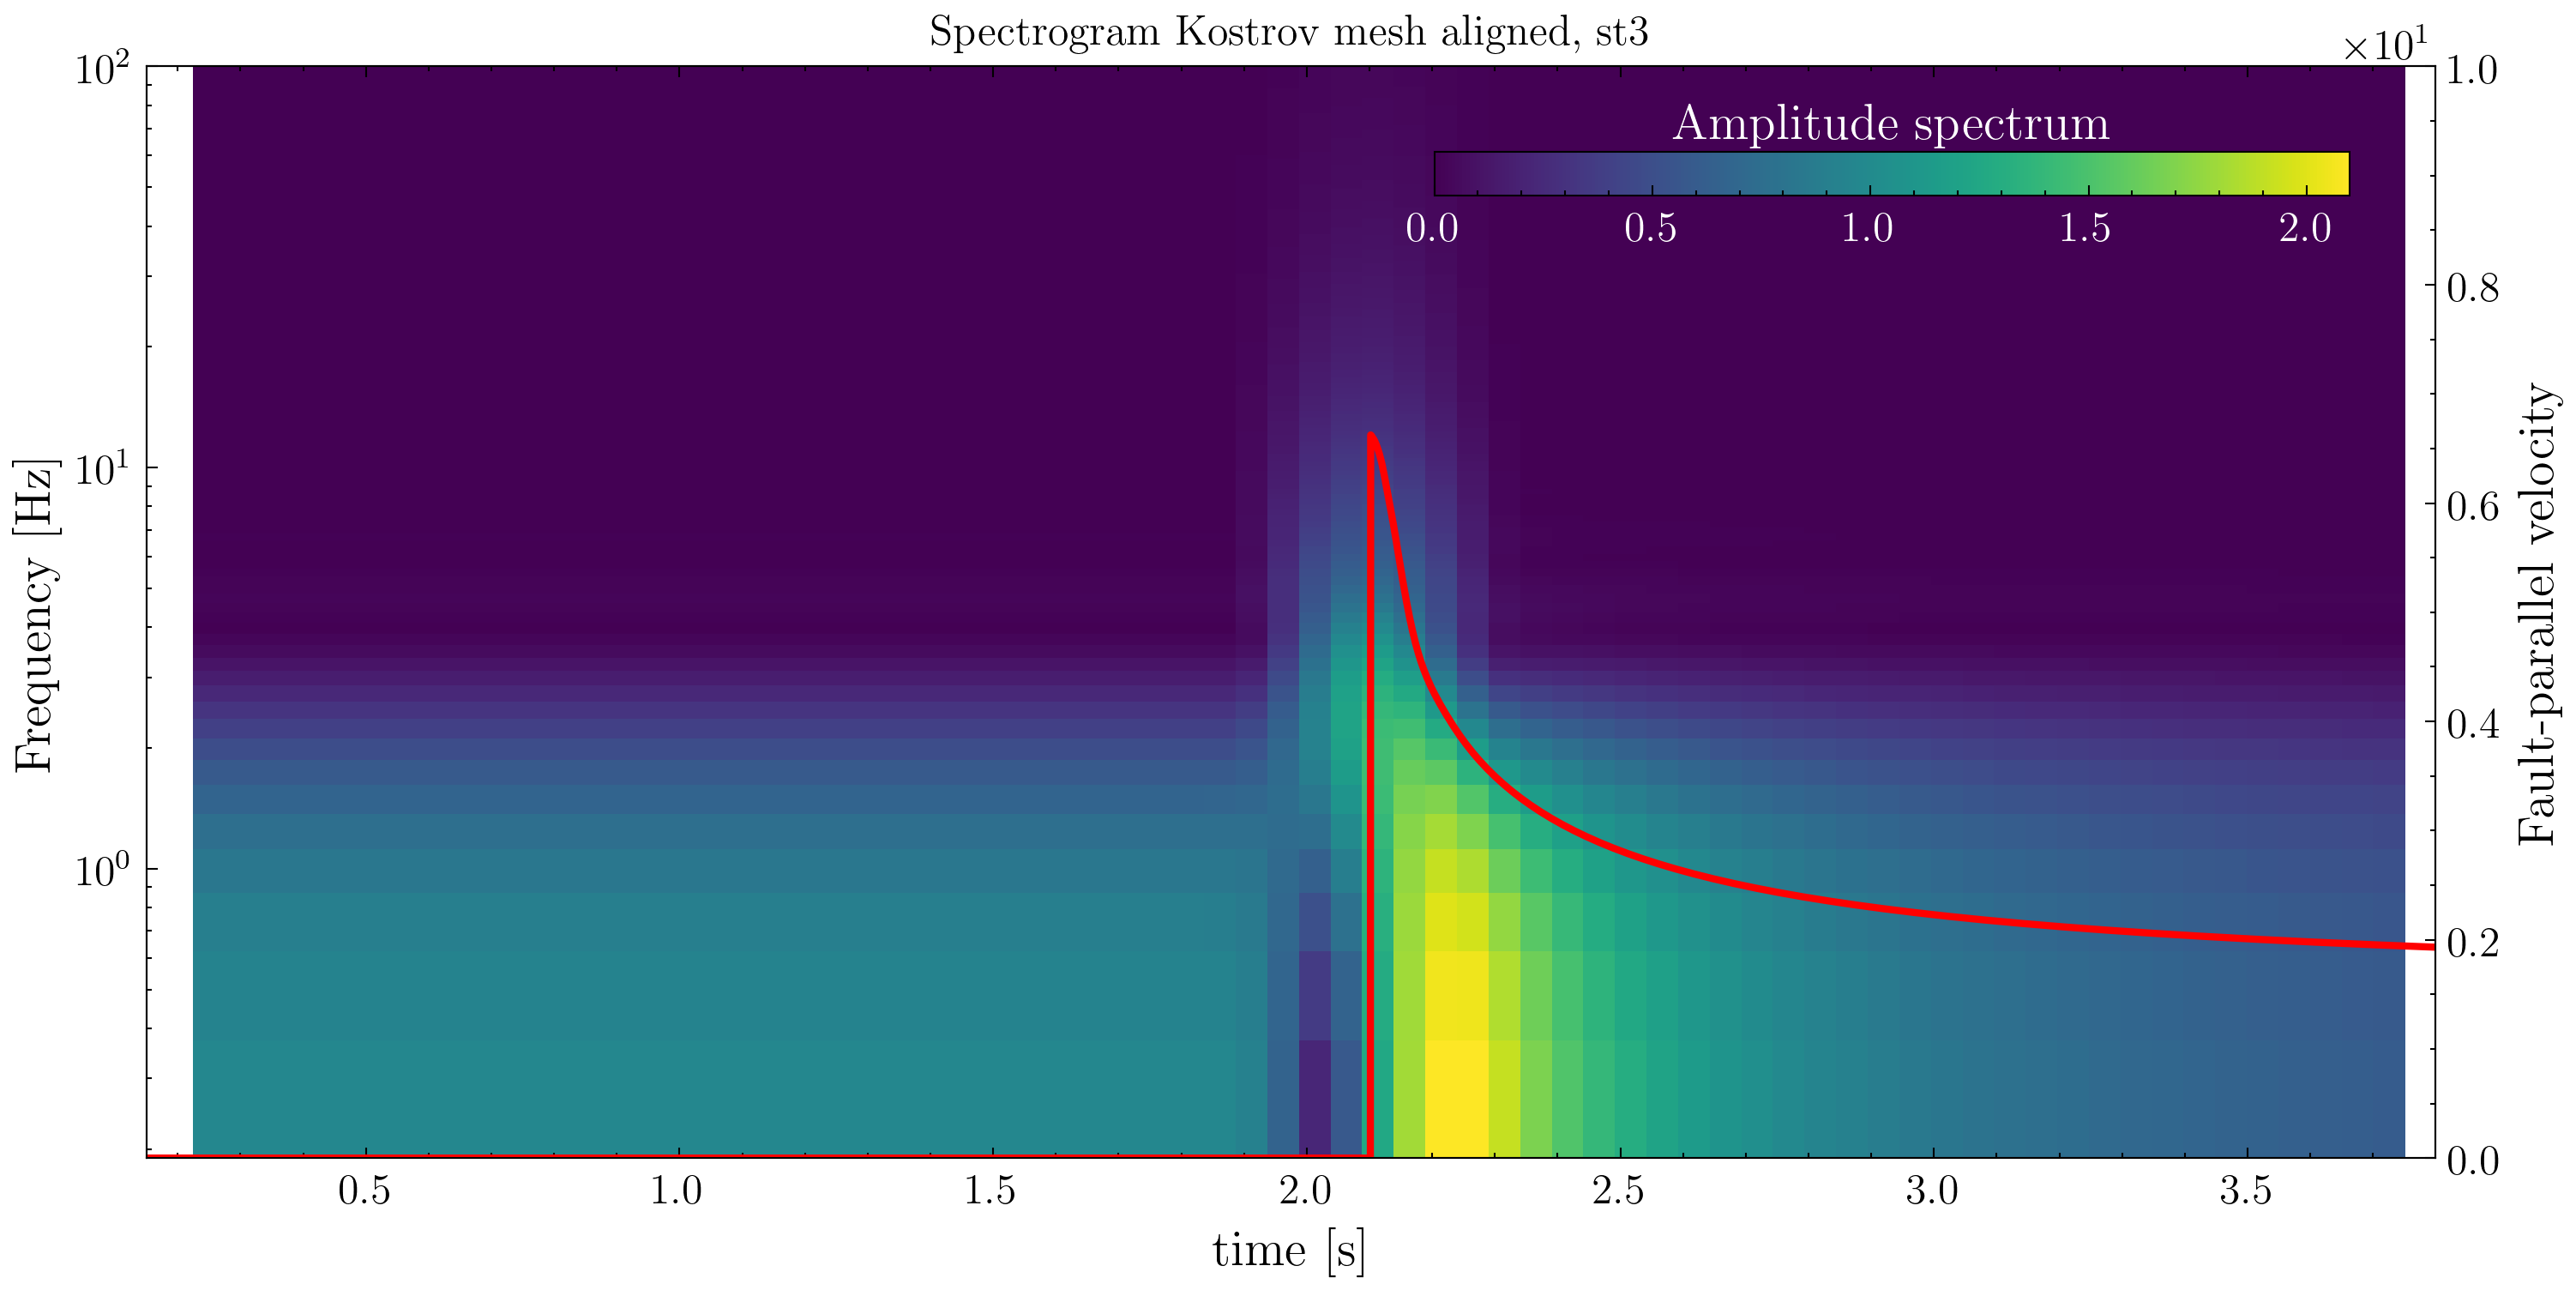

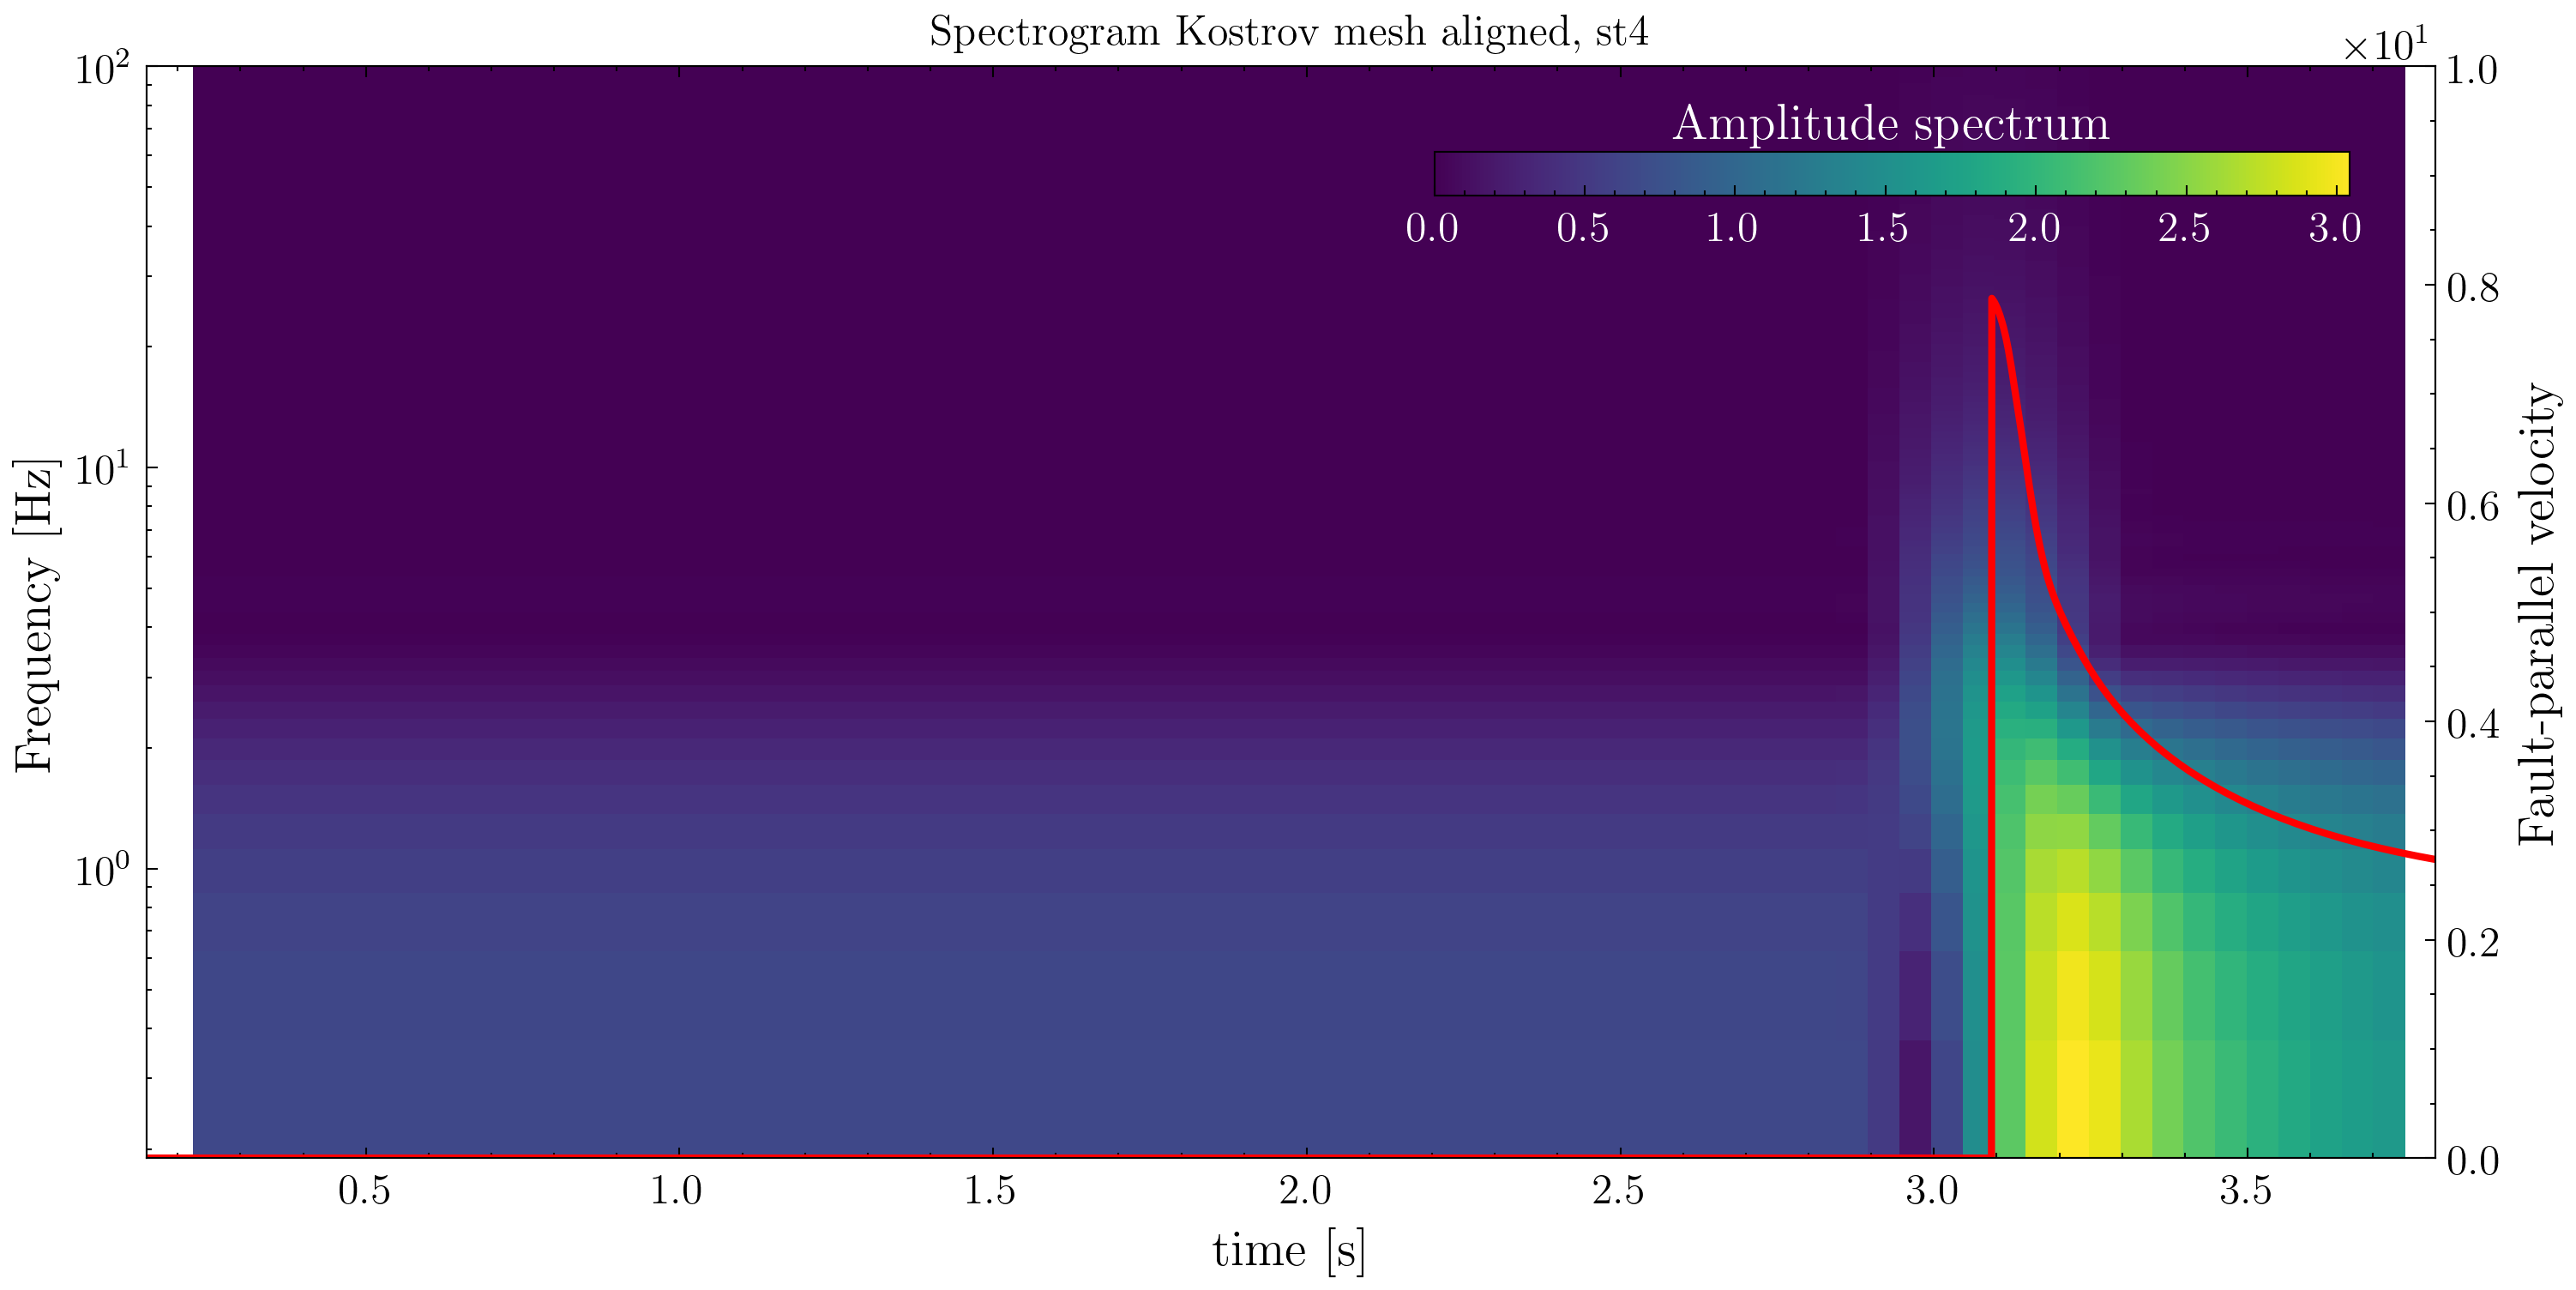

In [4]:
for i in range(1,5):

    station = str(i)

    ColumnOfInterest = [i.format(station) for i in ["slip_st{}", "sliprate_st{}", "mu_st{}", "sliding_st{}"]]
    ColumnOfInterest.insert(0,"Time")
    DataStation = Dataframe[ColumnOfInterest]

    time = np.asarray(DataStation.Time.tolist())
    Vel = np.asarray(DataStation["sliprate_st{}".format(station)].tolist())
    accel = np.asarray(pd.Series(np.gradient(DataStation["sliprate_st{}".format(station)]), time, name='slope').tolist())

    fig = plt.figure(figsize = (10, 5),dpi=300, constrained_layout=True)
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[:, :])
    ax2 = ax.twinx()

    sfig = spectrogram.spectrogram(Vel,len(Vel)/4,log=True,axes=ax,show=False)
    ax.set_xlim([0.15,3.8])
    ax.set_ylim([0.19,1e2])
    ax.set_ylabel("Frequency [Hz]")
    ax.set_xlabel("time [s]")

    mappable = ax.collections[0]
    cbaxes = inset_axes(ax,width="40%",height="4%",loc=1, borderpad=2)
    plt.colorbar(mappable=mappable, cax=cbaxes, orientation="horizontal", label="Amplitude spectrum")
    cbaxes.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    cbaxes.xaxis.set_label_position('top')


    cbaxes.xaxis.label.set_color('white')
    cbaxes.tick_params(labelcolor='white')

    ax2.plot(time,Vel,lw=2,c='r')
    ax2.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    ax2.set_ylim([0,10])
    ax2.set_ylabel("Fault-parallel velocity")

    ax.set_title('Spectrogram Kostrov mesh aligned, st{}'.format(station))



In [7]:
time.max()

4.0003

# Spectrogram for TPV3 -TO REPLACE-

In [5]:
path = '/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/Old/TEAR_TPV_T0_P3_025x025_d1.001_tanh12ph65/'
Filename = 'receiverCP-dr-800x800-p3.dat'

Dataframe = pd.read_csv(path+Filename, header=35, sep= ' ',
                       names=["Time","slip_st1", "sliprate_st1", "mu_st1", "sliding_st1",
                                     "slip_st2", "sliprate_st2", "mu_st2", "sliding_st2",
                                     "slip_st3", "sliprate_st3", "mu_st3", "sliding_st3",
                                     "slip_st4", "sliprate_st4", "mu_st4", "sliding_st4",
                                     "slip_st5", "sliprate_st5", "mu_st5", "sliding_st5",
                                     "slip_st6", "sliprate_st6", "mu_st6", "sliding_st6",
                                     "slip_st7", "sliprate_st7", "mu_st7", "sliding_st7"]
                       )
station = str(6)

ColumnOfInterest = [i.format(station) for i in ["slip_st{}", "sliprate_st{}", "mu_st{}", "sliding_st{}"]]
ColumnOfInterest.insert(0,"Time")
DataStation = Dataframe[ColumnOfInterest]

time = np.asarray(DataStation.Time.tolist())
accel = np.asarray(pd.Series(np.gradient(DataStation["sliprate_st{}".format(station)]), time, name='slope').tolist())


FileNotFoundError: File b'/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/Old/TEAR_TPV_T0_P3_025x025_d1.001_tanh12ph65/receiverCP-dr-800x800-p3.dat' does not exist

In [ ]:

for i in range(1,6):
    station = str(i)

    ColumnOfInterest = [i.format(station) for i in ["slip_st{}", "sliprate_st{}", "mu_st{}", "sliding_st{}"]]
    ColumnOfInterest.insert(0,"Time")
    DataStation = Dataframe[ColumnOfInterest]

    time = np.asarray(DataStation.Time.tolist())
    Vel = np.asarray(DataStation["sliprate_st{}".format(station)].tolist())
    accel = np.asarray(pd.Series(np.gradient(DataStation["sliprate_st{}".format(station)]), time, name='slope').tolist())

    fig = plt.figure(figsize = (10, 5),dpi=300, constrained_layout=True)
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[:, :])
    ax2 = ax.twinx()

    sfig = spectrogram.spectrogram(Vel,len(Vel)/4,log=True,axes=ax,show=False)
    ax.set_xlim([0.15,3.8])
    ax.set_ylim([0.19,1e2])
    ax.set_ylabel("Frequency [Hz]")
    ax.set_xlabel("time [s]")

    mappable = ax.collections[0]
    cbaxes = inset_axes(ax,width="40%",height="4%",loc=1, borderpad=2)
    plt.colorbar(mappable=mappable, cax=cbaxes, orientation="horizontal", label="Amplitude spectrum")
    cbaxes.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    cbaxes.xaxis.set_label_position('top')


    cbaxes.xaxis.label.set_color('white')
    cbaxes.tick_params(labelcolor='white')

    ax2.plot(time,Vel,lw=2,c='r')
    ax2.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    ax2.set_ylim([0,10])
    ax2.set_ylabel("Fault-parallel velocity")

    ax.set_title('Spectrogram Kostrov mesh aligned, st{}'.format(station))


In [ ]:
station = str(1)

ColumnOfInterest = [i.format(station) for i in ["slip_st{}", "sliprate_st{}", "mu_st{}", "sliding_st{}"]]
ColumnOfInterest.insert(0,"Time")
DataStation = Dataframe[ColumnOfInterest]

time = np.asarray(DataStation.Time.tolist())
Vel = np.asarray(DataStation["sliprate_st{}".format(station)].tolist())
accel = np.asarray(pd.Series(np.gradient(DataStation["sliprate_st{}".format(station)]), time, name='slope').tolist())

fig = plt.figure(figsize = (10, 5),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[:, :])
ax2 = ax.twinx()

sfig = spectrogram.spectrogram(accel,len(accel)/4,log=True,axes=ax,show=False)
ax.set_xlim([0.15,3.8])
ax.set_ylim([0.19,1e2])
ax.set_ylabel("Frequency [Hz]")
ax.set_xlabel("time [s]")

mappable = ax.collections[0]
cbaxes = inset_axes(ax,width="40%",height="4%",loc=1, borderpad=2)
plt.colorbar(mappable=mappable, cax=cbaxes, orientation="horizontal", label="Amplitude spectrum")
cbaxes.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
cbaxes.xaxis.set_label_position('top')


cbaxes.xaxis.label.set_color('white')
cbaxes.tick_params(labelcolor='white')

ax2.plot(time,accel,lw=2,c='r')
ax2.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax2.set_ylabel("Fault-parallel acceleration")

ax.set_title('Spectrogram TPV3 mesh aligned')

